# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 595


['bilibino',
 'bubaque',
 'san antonio huista',
 'khandyga',
 'labytnangi',
 'woodlake',
 'isle of lewis',
 'kingaroy',
 'adamstown',
 'as sulayyil',
 'waitangi',
 'port-aux-francais',
 'paciran',
 'iskateley',
 'tangalle',
 'luganville',
 'grytviken',
 'avarua',
 'hermanus',
 'college',
 'edinburgh of the seven seas',
 'margaret river',
 'fale old settlement',
 'galesong',
 'isafjordur',
 'menongue',
 'nsanje',
 'ust-tsilma',
 'puerto natales',
 'sosnovo-ozerskoye',
 'thompson',
 'boa vista',
 'taltal',
 'bredasdorp',
 'remire-montjoly',
 'ilulissat',
 'san jose village',
 'saint-philippe',
 'kodiak',
 'bandarbeyla',
 'enewetak',
 'blackmans bay',
 'invercargill',
 'kenai',
 'palmer',
 'dudinka',
 'visby',
 'coari',
 'nagqu',
 'west island',
 'zeya',
 'papatowai',
 'iqaluit',
 'bataipora',
 'kutum',
 'karamay',
 'cable beach',
 'tolanaro',
 'raduzhny',
 'badger',
 'mariental',
 'qaqortoq',
 'andergrove',
 'happy valley-goose bay',
 'colonia',
 'ola',
 'port elizabeth',
 'sechura',
 'z

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
Newurl = url + "appid=" + weather_api_key + "&q=" + "albany"
city_weather = requests.get(Newurl).json()
city_weather
city_max_temp = city_weather["dt"]
city_max_temp


1699847545

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
Newurl = url + "appid=" + weather_api_key + "&q=" + "albany"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | san antonio huista
Processing Record 4 of Set 1 | khandyga
Processing Record 5 of Set 1 | labytnangi
Processing Record 6 of Set 1 | woodlake
Processing Record 7 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 8 of Set 1 | kingaroy
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | as sulayyil
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | paciran
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | tangalle
Processing Record 16 of Set 1 | luganville
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing R

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,1.94,98,100,5.46,RU,1699847261
1,bubaque,11.2833,-15.8333,82.63,65,10,7.65,GW,1699847547
2,san antonio huista,15.6500,-91.7667,70.52,86,30,4.43,GT,1699847548
3,khandyga,62.6667,135.6000,-4.07,93,100,1.54,RU,1699847289
4,labytnangi,66.6572,66.4183,9.05,89,23,8.10,RU,1699847548


In [8]:

# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,1.94,98,100,5.46,RU,1699847261
1,bubaque,11.2833,-15.8333,82.63,65,10,7.65,GW,1699847547
2,san antonio huista,15.6500,-91.7667,70.52,86,30,4.43,GT,1699847548
3,khandyga,62.6667,135.6000,-4.07,93,100,1.54,RU,1699847289
4,labytnangi,66.6572,66.4183,9.05,89,23,8.10,RU,1699847548


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

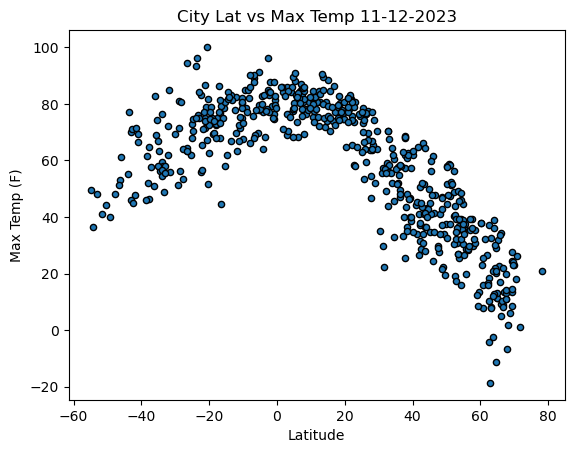

In [33]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp",
                   ylabel="Max Temp (F)", xlabel="Latitude",
                   title="City Lat vs Max Temp 11-12-2023",
                   edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

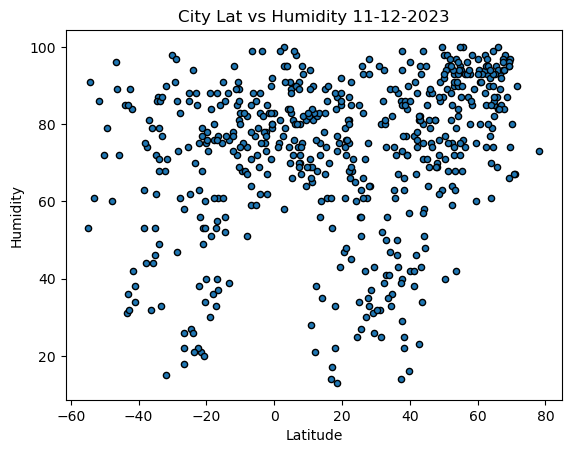

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity",
                   ylabel="Humidity", xlabel="Latitude",
                   title="City Lat vs Humidity 11-12-2023",
                   edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

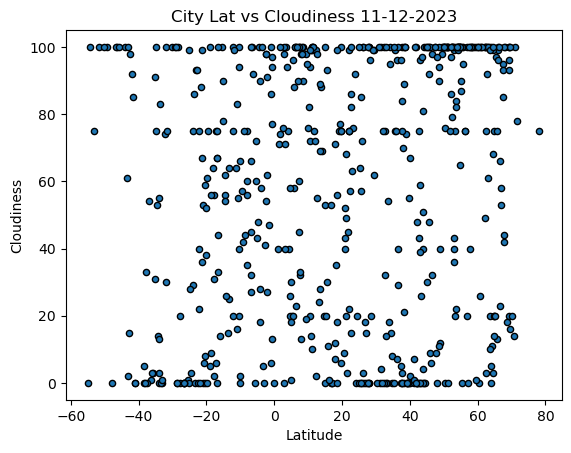

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                   ylabel="Cloudiness", xlabel="Latitude",
                   title="City Lat vs Cloudiness 11-12-2023",
                   edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

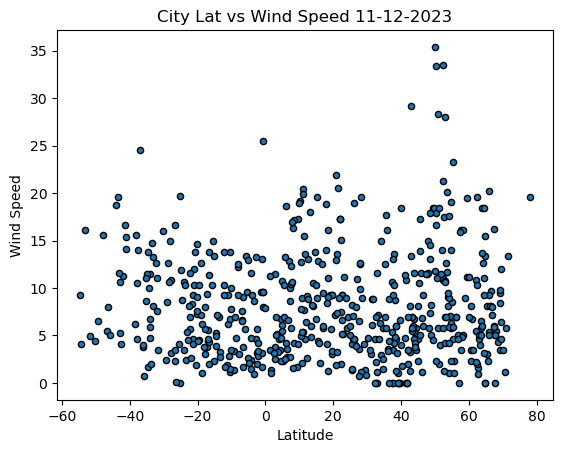

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed",
                   ylabel="Wind Speed", xlabel="Latitude",
                   title="City Lat vs Wind Speed 11-12-2023",
                   edgecolor="black")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [19]:
# Define a function to create Linear Regression plots
def Linear_Regressions(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.show()
    Pearson_Correlation = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r valueis {Pearson_Correlation}")
    if abs(Pearson_Correlation) >= .7:    
        print("Strong Correlation")
    elif abs(Pearson_Correlation) >= .5:
        print("Moderate Correlation")
    elif abs(Pearson_Correlation) >= .3:
        print("Weak Correlation")
    elif abs(Pearson_Correlation) < .3:
        print("No Correlation")

In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,1.94,98,100,5.46,RU,1699847261
1,bubaque,11.2833,-15.8333,82.63,65,10,7.65,GW,1699847547
2,san antonio huista,15.6500,-91.7667,70.52,86,30,4.43,GT,1699847548
3,khandyga,62.6667,135.6000,-4.07,93,100,1.54,RU,1699847289
4,labytnangi,66.6572,66.4183,9.05,89,23,8.10,RU,1699847548


In [8]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,kingaroy,-26.5333,151.8333,94.42,26,0,2.33,AU,1699847549
7,adamstown,-25.0660,-130.1015,73.02,86,99,19.71,PN,1699847431
9,waitangi,-43.9535,-176.5597,55.31,85,100,18.75,NZ,1699847550
10,port-aux-francais,-49.3500,70.2167,39.99,79,100,6.49,TF,1699847550
11,paciran,-6.8767,112.3761,89.01,59,45,7.58,ID,1699847551


###  Temperature vs. Latitude Linear Regression Plot

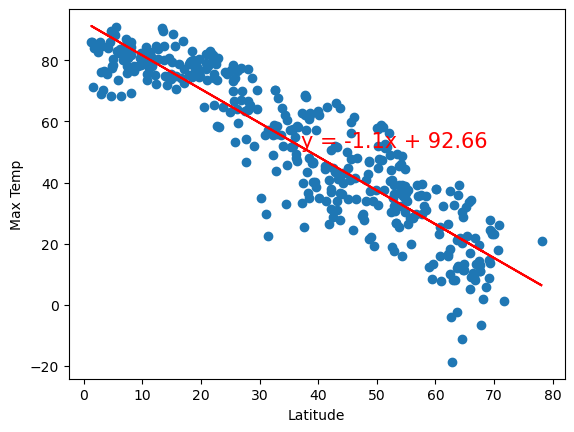

The r valueis -0.91
Strong Correlation


In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
Linear_Regressions(x_values, y_values)

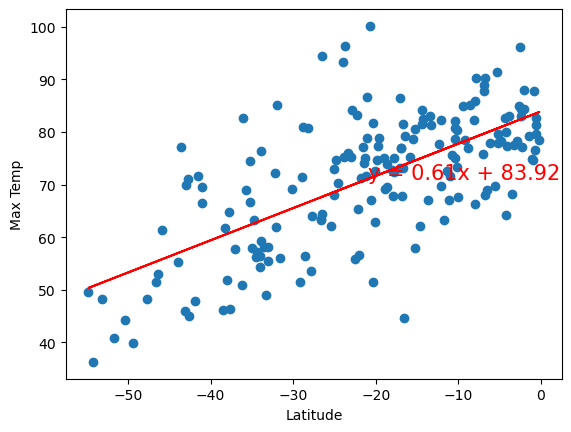

The r valueis 0.67
Moderate Correlation


In [28]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
Linear_Regressions(x_values, y_values)

**Discussion about the linear relationship:** There is a negative correlation between increasing values in latitude and max temperature. According to the top graph, for one degree increase in latitude, temperature should increase 1.1 degrees (f).

### Humidity vs. Latitude Linear Regression Plot

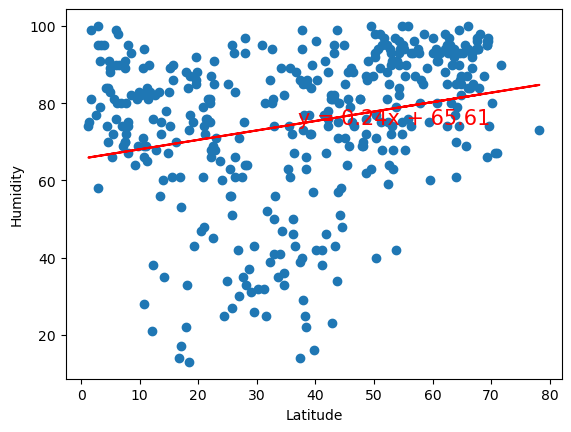

The r valueis 0.25
No Correlation


In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
Linear_Regressions(x_values, y_values)

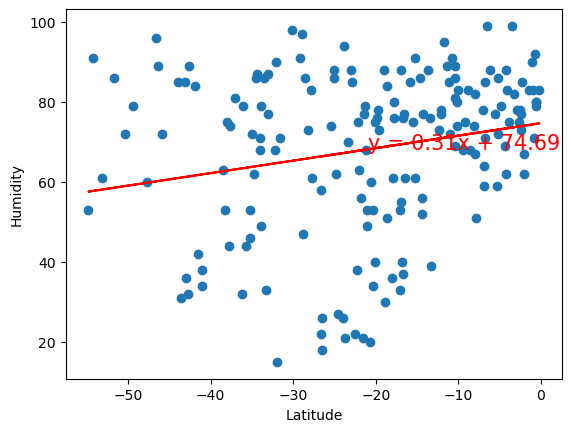

The r valueis 0.21
No Correlation


In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
Linear_Regressions(x_values, y_values)

**Discussion about the linear relationship:** There is no significance relationship between Latitude and Cloud Humidity based on the data sample.

### Cloudiness vs. Latitude Linear Regression Plot

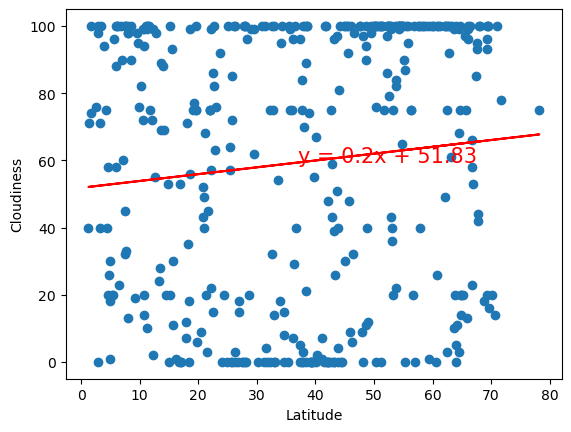

The r valueis 0.1
No Correlation


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
Linear_Regressions(x_values, y_values)

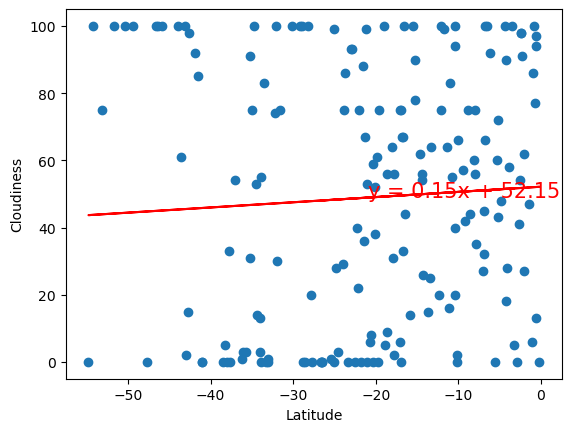

The r valueis 0.06
No Correlation


In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
Linear_Regressions(x_values, y_values)

**Discussion about the linear relationship:** There is no significant relationship between latitude and cloud cover based on the data sample.

### Wind Speed vs. Latitude Linear Regression Plot

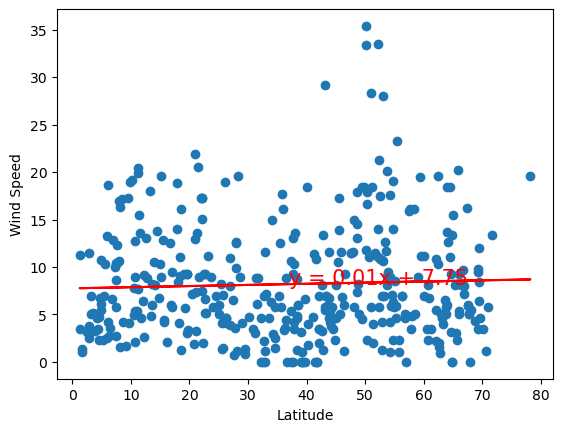

The r valueis 0.04
No Correlation


In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
Linear_Regressions(x_values, y_values)

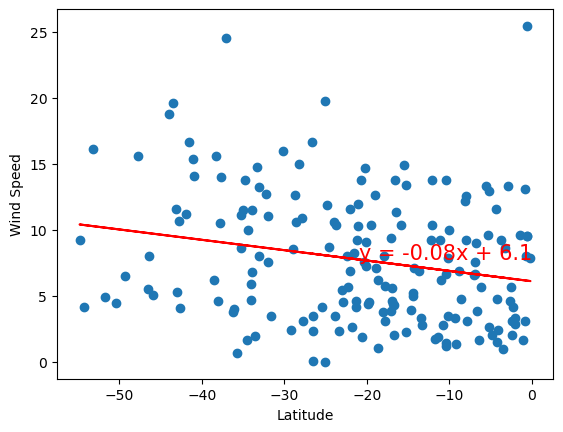

The r valueis -0.22
No Correlation


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
Linear_Regressions(x_values, y_values)

**Discussion about the linear relationship:** There is no signifcant relationship between wind speed and latitude based on the data sample.